# Import Library

Pertama-tama, dilakukan import untuk seluruh library yang digunakan untuk proyek ini.

In [109]:
from google.colab import userdata
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Data Loading

Awalnya, diambil data terkait username dan key kaggle dari Google Colab Secrets supaya bisa mengakses kaggle untuk pengambilan dataset Student Performance.

In [ ]:
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')

Selanjutnya, dilakukan pengambilan dataset Student Performance dari platform Kaggle. Data yang diambil dalam bentuk zip kemudian akan di unzip terlebih dahulu sehingga muncul sebuah file csv baru bernama Student_Performance.csv

In [ ]:
!kaggle datasets download -d nikhil7280/student-performance-multiple-linear-regression
!unzip student-performance-multiple-linear-regression.zip

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression
License(s): other
Archive:  student-performance-multiple-linear-regression.zip
  inflating: Student_Performance.csv  


Kemudian, dilakukan perubahan format dataset dari csv menjadi Pandas DataFrame supaya memudahkan pengolahan dataset tersebut. DataFrame disimpan dalam variabel **df**. Kemudian kita melihat isi dataset tersebut.

In [162]:
df = pd.read_csv("Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Bisa dilihat bahwa dataset terdiri dari 10.000 baris 6 kolom/fitur.

# Exploratory Data Analysis

## Deskripsi Variabel

Variabel                         | Keterangan
---------------------------------|-------------
Hours Studied                    | Jumlah total jam yang dihabiskan untuk belajar oleh setiap siswa.
Previous Scores                  | Nilai yang diperoleh oleh siswa dalam ujian sebelumnya.
Extracurricular Activities       | Apakah siswa berpartisipasi dalam kegiatan ekstrakurikuler (Ya atau Tidak).
Sleep Hours                      | Rata-rata jumlah jam tidur yang dimiliki siswa per hari.
Sample Question Papers Practiced | Jumlah lembar soal latihan yang dikerjakan siswa.
Performance Index                | Sebuah ukuran dari kinerja keseluruhan setiap siswa. Performance Index mewakili kinerja akademik siswa dan telah dibulatkan ke <br>bilangan bulat terdekat. Indeks berkisar dari 10 hingga 100, dengan nilai yang lebih tinggi menunjukkan kinerja yang lebih baik.

Kode dibawah akan menampilkan informasi tentang setiap variabel dalam dataset **df**

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Dari hasil kode diatas, terdapat 5 variabel numerik dan 1 variabel kategorikal bertipe data object dengan valuenya berupa 'Yes' dan 'No'. Bisa dilihat juga bahwa setiap variabel tidak terdapat nilai null/kosong.

Selanjutnya kita akan melihat deskripsi dataset tersebut terkait sebaran datanya, nilai minimal, nilai maksimal, dan lain-lain.

In [164]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


Dari hasil kode diatas, bisa dilihat untuk nilai count, mean, std, min, Q1, Q2, Q3, dan max dari setiap variabel numerik pada **df**.

## Menangani Duplikasi Data

Pada bagian ini, kita akan mengecek apakah terdapat data duplikat di dataset **df**

In [165]:
print("Jumlah duplikasi data:", df.duplicated().sum())

Jumlah duplikasi data: 127


Dari hasil kode tersebut, terlihat bahwa terdapat 127 data duplikat yang akan kita hapus nantinya untuk meningkatkan performa model.

Selanjutnya, kita menghapus semua data duplikat pada dataset kita lalu melihat apakah penghapusan tersebut berhasil.

In [166]:
df.drop_duplicates(inplace=True)
print("Jumlah duplikasi data", df.duplicated().sum())
df.shape

Jumlah duplikasi data 0


(9873, 6)

Bisa dilihat bahwa data yang duplikat sudah berhasil dihapus semuanya dan sekarang menyisakan 9.873 baris dan 6 kolom pada dataset kita.

## Univariate Analysis

### Categorical Features

Selanjutnya, kita akan menampilkan pie chart untuk menunjukkan perbandingan antara siswa yang mengikuti aktivitas ekstrakulikuler dengan yang tidak mengikuti ekstrakulikuler

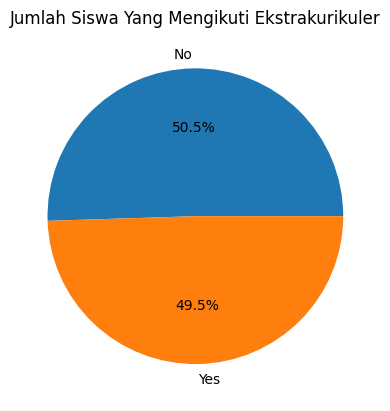

In [91]:
count = df['Extracurricular Activities'].value_counts()
count.plot(kind='pie', title='Jumlah Siswa Yang Mengikuti Ekstrakurikuler', autopct='%1.1f%%', labels=count.index)
plt.ylabel('')
plt.show()

Hasil dari grafik pie diatas menunjukkan bahwa perbandingan antara jumlah siswa yang mengikuti dan tidak mengikuti ekstrakulikuler tidak berbeda jauh, yaitu 49,5% untuk yang mengikuti ekstrakulikuler dan 50.5% siswa yang tidak mengikuti ekstrakulikuler.

### Numerical Features

Selanjutnya, kita akan melihat distribusi data dari kolom-kolom numerik menggunakan histogram.

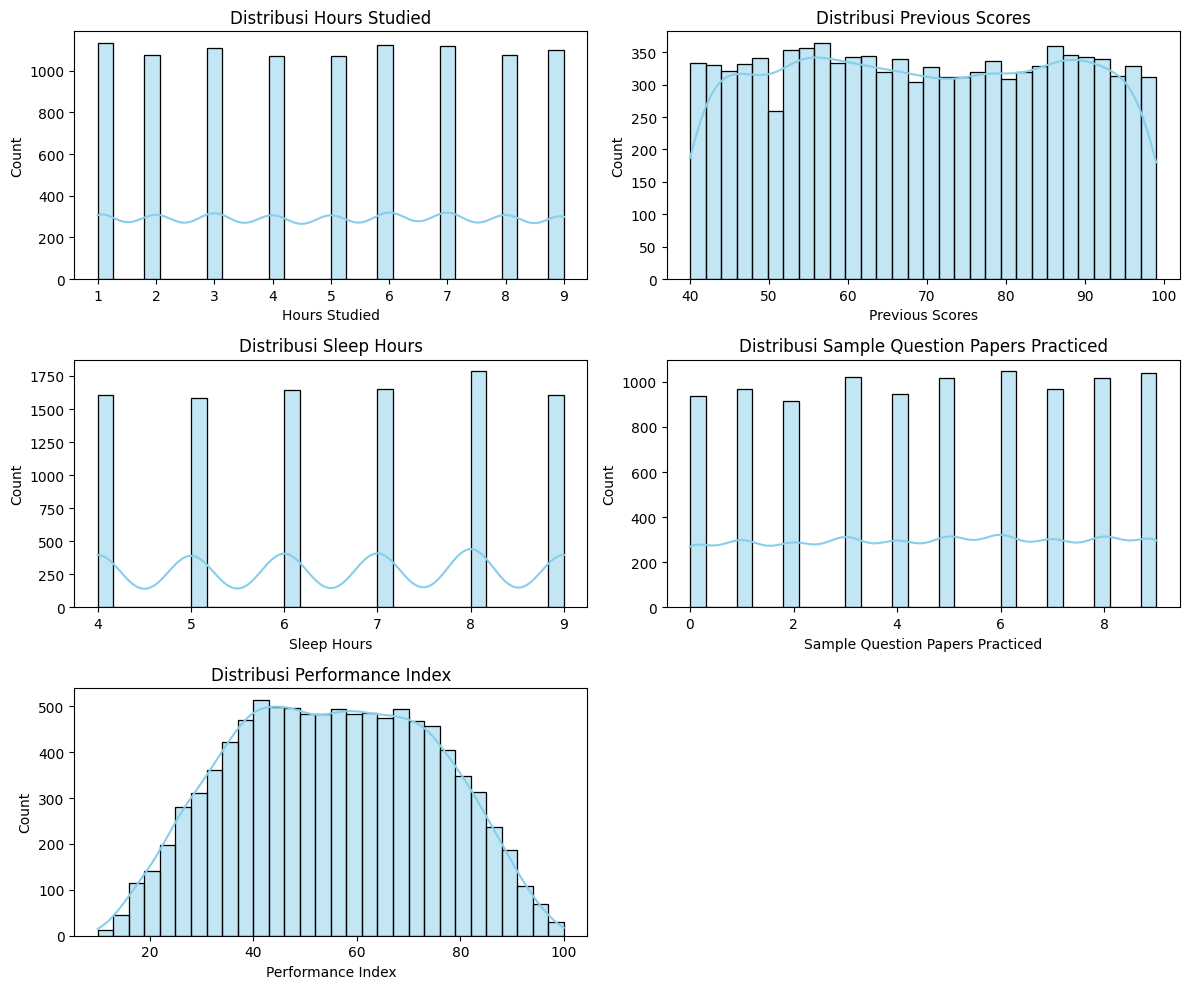

In [92]:
# List kolom numerik
numeric_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours',
                'Sample Question Papers Practiced', 'Performance Index']

n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols

plt.figure(figsize=(12, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Dari hasil kode diatas, bisa dilihat bahwa distribusi dari setiap kolom numerik cukup normal.

## Multivariate Analysis

### 1. Analisis Pengaruh Extracurricular Activities terhadap Performance Index

Kemudian, kita melakukan visualisasi data menggunakan bar chart untuk menunjukkan bagaimana pengaruh dari fitur Extracurricular Activities terhadap variabel target Performance Index

<ipython-input-93-009a19152848>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Extracurricular Activities', y='Performance Index', data=df, palette='Pastel1')


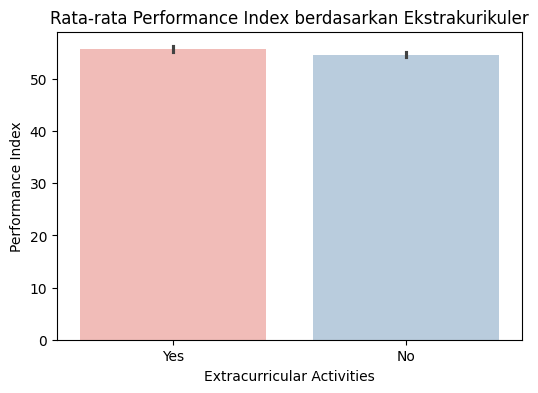

In [93]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Extracurricular Activities', y='Performance Index', data=df, palette='Pastel1')
plt.title('Rata-rata Performance Index berdasarkan Ekstrakurikuler')
plt.show()

Dari grafik diatas, terlihat bahwa siswa yang mengikuti kegiatan ekstrakurikuler (Yes) memiliki rata-rata Performance Index sedikit lebih tinggi dibandingkan dengan siswa yang tidak mengikuti (No). Namun perbedaannya sangatlah kecil sehingga bisa disimpulkan bahwa pengaruh dari mengikuti aktivitas ekstrakulikuler terhadap performance index sangat kecil.

### 2. Analisis Pengaruh Hours Studied terhadap Performance Index

Dibagian ini, dilakukan visualisasi data menggunakan bar chart untuk melihat pengaruh antara jumlah jam belajar (Hours Studied) terhadap Performance Index siswa.

<ipython-input-94-bcfe879fe036>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hours Studied', y='Performance Index', data=df, palette='Pastel1')


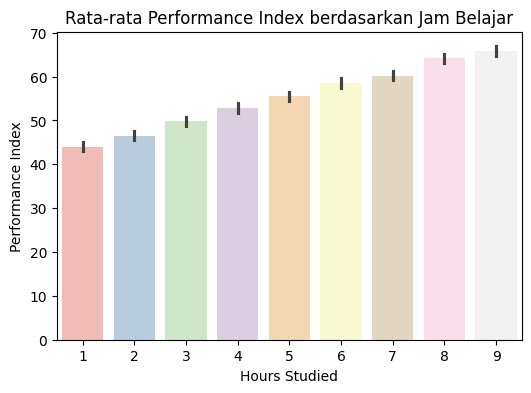

In [94]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Hours Studied', y='Performance Index', data=df, palette='Pastel1')
plt.title('Rata-rata Performance Index berdasarkan Jam Belajar')
plt.show()

Dari grafik diatas, terlihat bahwa terdapat perbedaan yang cukup besar antara performance index siswa yang belajar hanya 1 jam dengan siswa yang belajar 9 jam. Perbedaan tersebut juga nampak pada setiap jam belajar, dimana performance index siswa juga turut mengalami peningkatan seiring dengan bertambahnya hours studied.

Sehingga bisa disimpulkan bahwa hours studied memiliki pengaruh yang cukup besar terhadap performance index siswa.

### 3. Analisis Pengaruh Fitur Numerik selain Hours Studied terhadap Performance Index

Selanjutnya , kita menggunakan bar chart untuk menvisualisasikan hubungan antara Sleep Hours dan Sample Question Papers Practiced terhadap Performance Index.

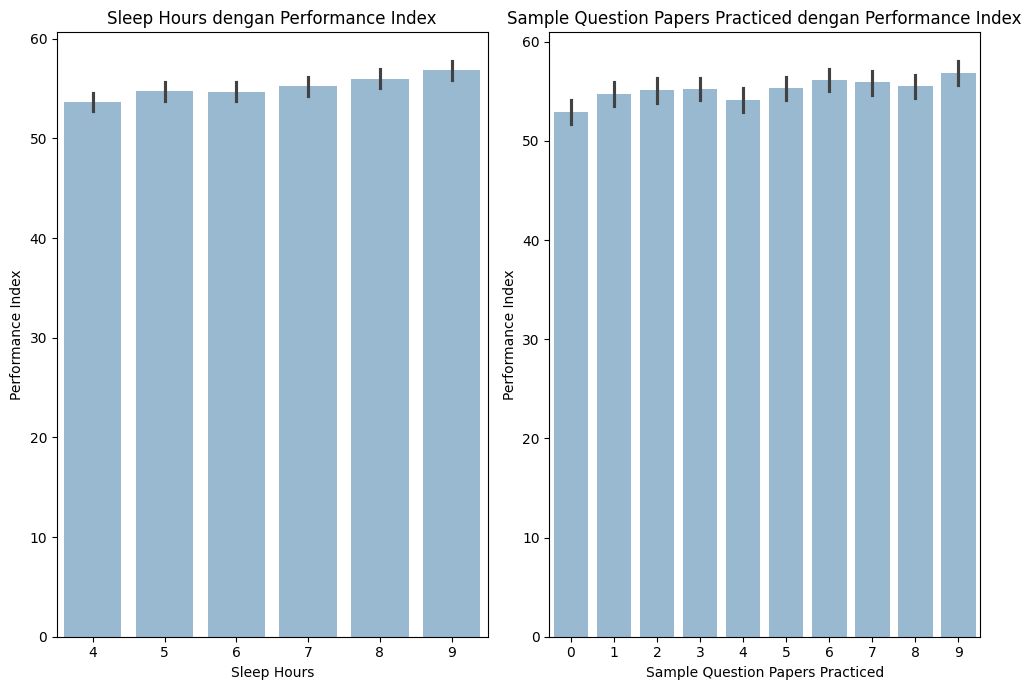

In [95]:
features = ['Sleep Hours', 'Sample Question Papers Practiced']

# Ukuran plot
plt.figure(figsize=(10, 7))

# Loop tiap fitur dan buat subplot scatter
for i, feature in enumerate(features):
    plt.subplot(1, 2, i+1)
    sns.barplot(data=df, x=feature, y='Performance Index', alpha=0.5)
    plt.title(f'{feature} dengan Performance Index')

plt.tight_layout()
plt.show()

Dari kedua grafik diatas, terlihat bahwa performance index mengalami perubahan yang sangat kecil, jadi pengaruh sleep hours dan sample question papers practiced terhadap Performance Index sangat kecil.

Kemudian, kita menggunakan scatter plot untuk menvisualisasikan hubungan antara previous score terhadap performance index.

<ipython-input-96-1f10140305b8>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Previous Scores', y='Performance Index', data=df, palette='Pastel1')


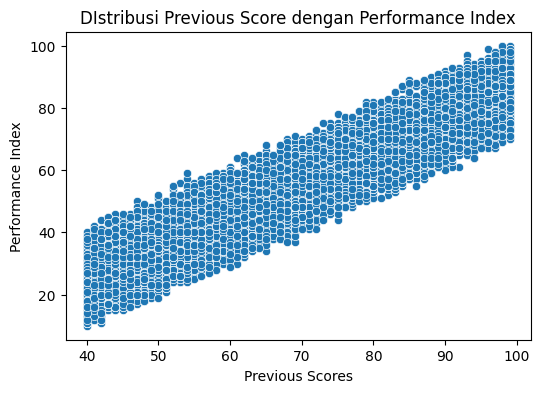

In [96]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Previous Scores', y='Performance Index', data=df, palette='Pastel1')
plt.title('DIstribusi Previous Score dengan Performance Index')
plt.show()

Dari grafik diatas, terlihat bahwa performance index siswa juga turut meningkat seiring dengan meningkatnya previous scores. Ini menunjukkan bahwa pengaruh previous scores terhadap performance index cukup besar.

### 4. Menggunakan Heatmap untuk melihat korelasi Fitur Numerik

Ditahap ini, kita menggunakan heatmap untuk menggambarkan matriks korelasi dari setiap fitur yang ada.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

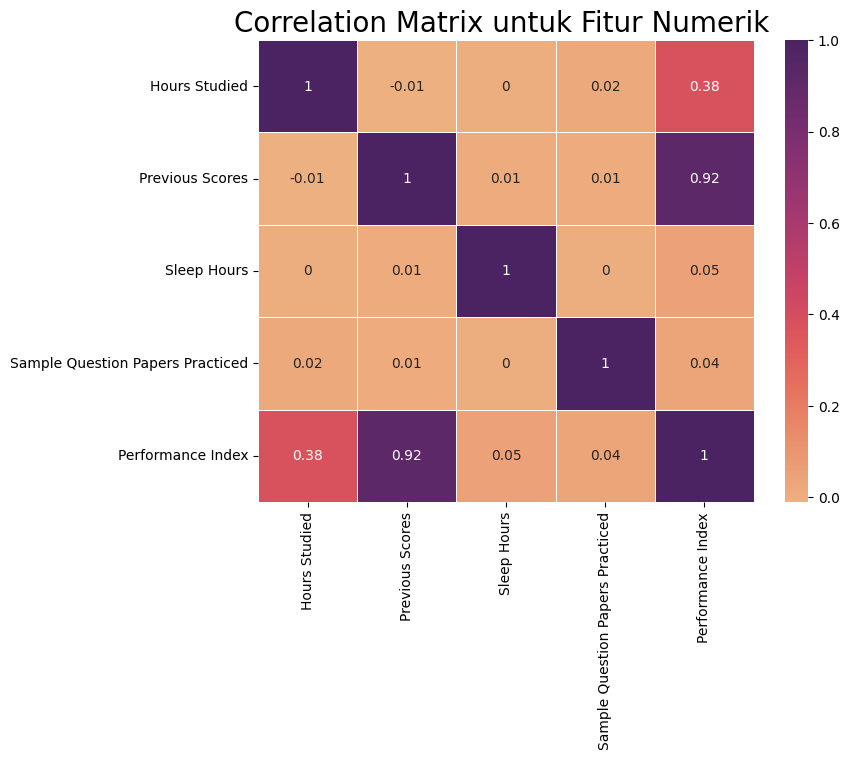

In [168]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[numeric_cols].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='flare', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Terlihat dari grafik diatas, bahwa:
1. Hours Studied memiliki korelasi positif yang tidak terlalu kuat terhadap Performance Index
2. Previous Score memiliki korelasi positif yang sangat kuat terhadap Performance Index
3. Selain dari kedua fitur Hours Studied dan Previous Score, fitur-fitur lain tidak memiliki korelasi/korelasi yang sangat kecil antara satu sama lain dan terhadap Performance Index

# Data Preparation

Ditahap ini, kita melakukan persiapan terhadap data supaya memiliki bentuk yang sesuai untuk digunakan pada model. Ada 2 tahap persiapan data yang dilakukan:
1. Encoding Fitur Kategorikal
2. Pembagian dataset menjadi data train dan data test

## Encoding Fitur Kategorikal

Ditahap ini, kita melakukan mapping terhadap kolom Extracurricular Activities yang merupakan kolom kategorikal. Proses mapping ini dilakukan dengan mengubah value pada kolom tersebut yaitu **Yes** menjadi **1** dan **No** menjadi **0**. Kemudian, dataset ditampilkan kembali untuk melihat apakah encoding fitur berhasil dilakukan.

In [97]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


Dapat terlihat dari tabel diatas bahwa Extracurricular Activities telah berhasil diencoding.

## Train-Test-Split

Disini kita melakukan pembagian dataset kita menjadi data training dan data testing menggunakan train_test_split dengan ukuran data training 80%, sedangkan data testing sebesar 20%. Namun sebelumnya kita menyimpan terlebih dahulu fitur-fitur ke variabel **X** dan variabel target ke variabel **y**

In [125]:
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Selanjutnya kita akan menampilkan ukuran dari fitur pada dataset awal, dataset training, dan dataset testing. Terlihat bahwa dataset training berukuran (7898, 5) dan dataset testing berukuran (1975, 5).

In [126]:
print(f'Ukuran dataset: {X.shape}')
print(f'Ukuran sampel pada train dataset: {X_train.shape}')
print(f'Ukuran sampel pada test dataset: {X_test.shape}')

Ukuran dataset: (9873, 5)
Ukuran sampel pada train dataset: (7898, 5)
Ukuran sampel pada test dataset: (1975, 5)


# Model Development

Pada tahap ini, kita akan membangun model menggunakan 2 algoritma berbeda yaitu SVM dan Random Forest. Metriks evaluasi berupa MSE dan RMSE akan digunakan untuk melihat model mana yang memiliki performa paling bagus, sehingga model tersebut yang akan digunakan untuk prediksi nilai Performance Index seterusnya.

## Support Vector Machine (SVM)

1. Pertama-tama dibuat sebuah objek SVR yang merupakan model Support Vector Regression. Karena pada pembuatan SVR tersebut tidak diberikan parameter apapun, maka SVR akan menggunakan parameter default:
- `kernel='rbf'`, digunakan untuk mengatur kernel berupa Radial Basis Function digunakan untuk menangkap hubungan non-linear.
- `C=1.0`, merupakan parameter regulasi. Semakin besar nilainya, semakin sedikit toleransi terhadap kesalahan.
- `epsilon=0.1`, merupakan margin toleransi di mana tidak dikenakan penalti jika prediksi dalam jarak 0.1 dari nilai sebenarnya.
- `gamma='scale'`, merupakan parameter untuk kernel RBF.

 Setelah itu dilakukan pelatihan model SVM menggunakan data latih.

In [127]:
svm = SVR()
svm.fit(X_train, y_train)

SVR()

2. Kita menggunakan model untuk memprediksi variabel target dari data latih dan data test, lalu mengukur nilai mse dan rmse pada kedua data tersebut.

In [131]:
y_pred_train_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

mse_train_svm = mean_squared_error(y_train, y_pred_train_svm)
mse_test_svm = mean_squared_error(y_test, y_pred_test_svm)

rmse_train_svm = root_mean_squared_error(y_train, y_pred_train_svm)
rmse_test_svm = root_mean_squared_error(y_test, y_pred_test_svm)

print(f'Mean Squared Error (MSE) SVM pada data train: {mse_train_svm}')
print(f'Mean Squared Error (MSE) SVM pada data test: {mse_test_svm}')
print(f'Root Mean Squared Error (RMSE) SVM pada data train: {rmse_train_svm}')
print(f'Root Mean Squared Error (RMSE) SVM pada data test: {rmse_test_svm}')

Mean Squared Error (MSE) SVM pada data train: 5.425058896819459
Mean Squared Error (MSE) SVM pada data test: 5.639182209418649
Root Mean Squared Error (RMSE) SVM pada data train: 2.32917558308073
Root Mean Squared Error (RMSE) SVM pada data test: 2.374696235188545


Dari output diatas, terlihat bahwa:
- MSE SVM pada data train: 5.425058896819459
- MSE SVM pada data test: 5.639182209418649
- RMSE SVM pada data train: 2.32917558308073
- RMSE SVM pada data test: 2.374696235188545

## Random Forest

1. Kita membuat objek rf dari RandomForestRegressor, yang merupakan model ensemble berbasis decision tree untuk regresi dengan parameter yang digunakan sebagai berikut:
- `n_estimators=100`, merupakan jumlah pohon keputusan (trees) dalam hutan. Semakin banyak pohon, biasanya model lebih stabil tapi lebih lambat.
- `max_depth=64`, menunjukkan maksimum kedalaman pohon. Mencegah pohon terlalu dalam agar tidak overfitting.
- `random_state=55`, digunakan untuk menjamin hasil reproducible (hasil sama setiap eksekusi).
- `n_jobs=-1`, berfungsi untuk menggunakan seluruh core CPU yang tersedia untuk paralelisasi pelatihan, mempercepat proses training.

 Setelah itu dilakukan pelatihan model Random Forest menggunakan data latih.

In [156]:
rf = RandomForestRegressor(n_estimators=100, max_depth=64, random_state=55, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=64, n_jobs=-1, random_state=55)

2. Kita menggunakan model untuk memprediksi variabel target dari data latih dan data test, lalu mengukur nilai mse dan rmse pada kedua data tersebut.

In [157]:
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

rmse_train_rf = root_mean_squared_error(y_train, y_pred_train_rf)
rmse_test_rf = root_mean_squared_error(y_test, y_pred_test_rf)

print(f'Mean Squared Error (MSE) Random Forest pada data train: {mse_train_rf}')
print(f'Mean Squared Error (MSE) Random Forest pada data test: {mse_test_rf}')
print(f'Root Mean Squared Error (RMSE) Random Forest pada data train: {rmse_train_rf}')
print(f'Root Mean Squared Error (RMSE) Random Forest pada data test: {rmse_test_rf}')

Mean Squared Error (MSE) Random Forest pada data train: 0.9303734675276086
Mean Squared Error (MSE) Random Forest pada data test: 5.599425060635741
Root Mean Squared Error (RMSE) Random Forest pada data train: 0.9645586905562609
Root Mean Squared Error (RMSE) Random Forest pada data test: 2.3663104320092367


Dari output diatas, terlihat bahwa:
- MSE Random Forest pada data train: 0.9303734675276086
- MSE Random Forest pada data test: 5.599425060635741
- RMSE Random Forest pada data train: 0.9645586905562609
- RMSE Random Forest pada data test: 2.3663104320092367

# Evaluasi Model

Di tahap ini, kita menyimpan nilai Mean Square Error (MSE) dari model SVM dan Random Forest terhadap data latih dan data testing ke DataFrame `mse_df`. Selanjutnya kita tampilkan dataframe tersebut.

In [158]:
mse_df = pd.DataFrame({
    'Train': [mse_train_svm, mse_train_rf],
    'Test': [mse_test_svm, mse_test_rf]}, index=['SVM', 'RF'])
mse_df

,Train,Test
SVM,5.425059,5.639182
RF,0.930373,5.599425


Terlihat bahwa baik di data train maupun data test, RF memiliki performa yang lebih bagus dengan nilai MSE yang lebih kecil dibandingkan SVM.

Selanjutnya, kita menyimpan nilai Root Mean Square Error (RMSE) dari model SVM dan Random Forest terhadap data latih dan data testing ke DataFrame `rmse_df`. Selanjutnya kita tampilkan dataframe tersebut.

In [159]:
rmse_df = pd.DataFrame({
    'Train': [rmse_train_svm, rmse_train_rf],
    'Test': [rmse_test_svm, rmse_test_rf]}, index=['SVM', 'RF'])
rmse_df

,Train,Test
SVM,2.329176,2.374696
RF,0.964559,2.366310


Dapat dilihat bahwa baik di data train maupun data test, RF memiliki performa yang lebih bagus dengan nilai RMSE yang lebih kecil dibandingkan SVM.

Sehingga bisa kita simpulkan bahwa Random Forest merupakan model terbaik karena nilai metriks evaluasinya yaitu MSE dan RMSE yang paling kecil nilainya.

Selanjutnya kita menggunakan bar chart untuk menampilkan visualisasi dari perbandingan antara nilai MSE dan RMSE kedua model terhadap data latih dan data testing.

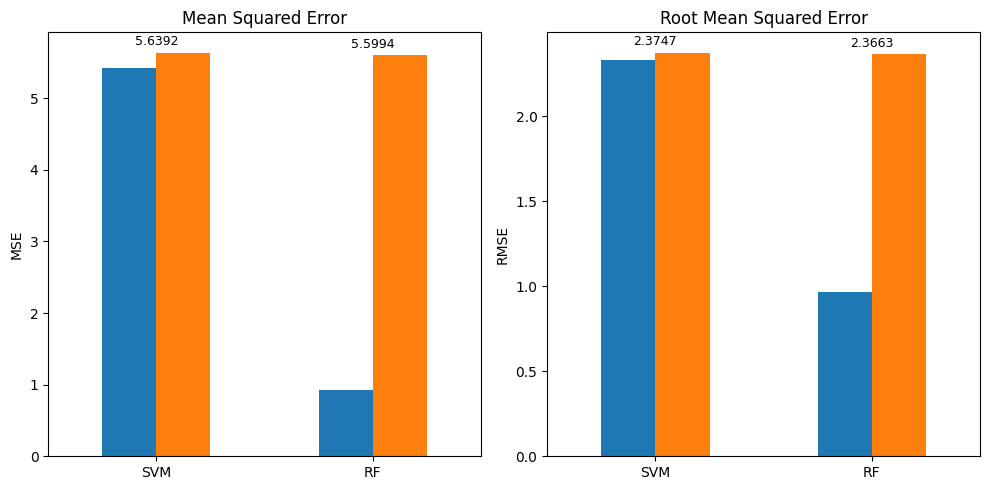

In [173]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot MSE
mse_df.sort_values(by='Test', ascending=False).plot(kind='bar', ax=ax[0], legend=False)
ax[0].set_title('Mean Squared Error')
ax[0].set_ylabel('MSE')
ax[0].tick_params(axis='x', rotation=0)
for i, val in enumerate(mse_df.sort_values(by='Test', ascending=False)['Test']):
    ax[0].text(i, val + 0.01 * val, f'{val:.4f}', ha='center', va='bottom', fontsize=9)

# Plot RMSE
rmse_df.sort_values(by='Test', ascending=False).plot(kind='bar', ax=ax[1], legend=False)
ax[1].set_title('Root Mean Squared Error')
ax[1].set_ylabel('RMSE')
ax[1].tick_params(axis='x', rotation=0)
for i, val in enumerate(rmse_df.sort_values(by='Test', ascending=False)['Test']):
    ax[1].text(i, val + 0.01 * val, f'{val:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Dari grafik terlihat bahwa RMSE dan MSE model Random Forest nilainya paling kecil. Hal ini menunjukkan bahwa Random Forest merupakan model terbaik karena nilai metriks evaluasinya yaitu MSE dan RMSE yang paling kecil nilainya.